<a href="https://colab.research.google.com/github/Skiiidoodle/Lung_cancer_prediction_ver1/blob/main/Lung_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

In [3]:
# Loading the Dataset

df = pd.read_csv('cancer_survey.csv')
count_row = df.shape[0]  # Gives number of rows
count_col = df.shape[1]  # Gives number of cols
print(df.head())

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      

In [4]:
print(f"Number of rows: {count_row}")
print(f"Number of columns: {count_col}")

Number of rows: 309
Number of columns: 16


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [6]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [7]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [8]:
df.duplicated().sum()

33

In [9]:
df.nunique()

GENDER                    2
AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64

In [10]:
df = df.drop_duplicates(keep = False) # Remove all duplicated row
print(df.duplicated().sum())

0


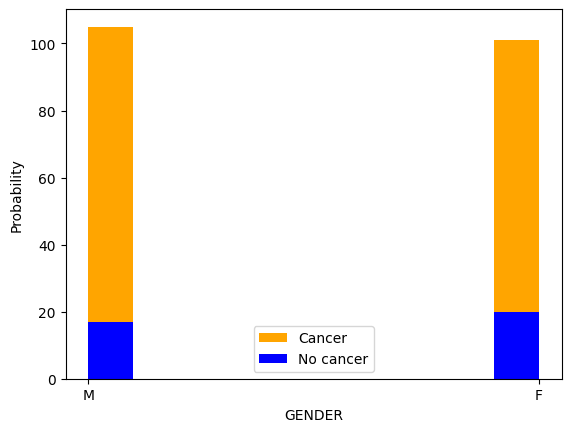

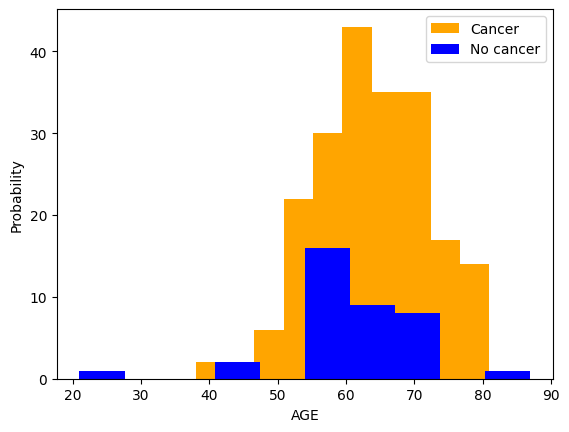

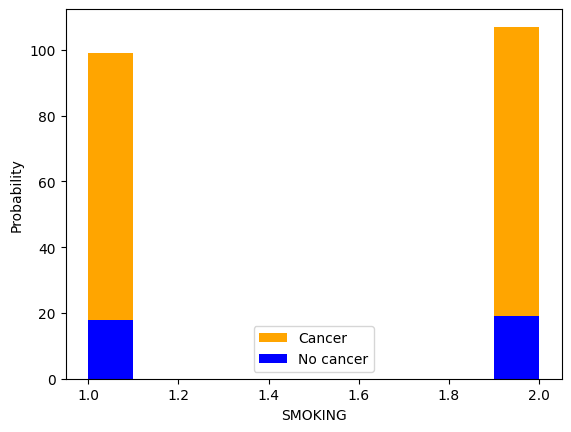

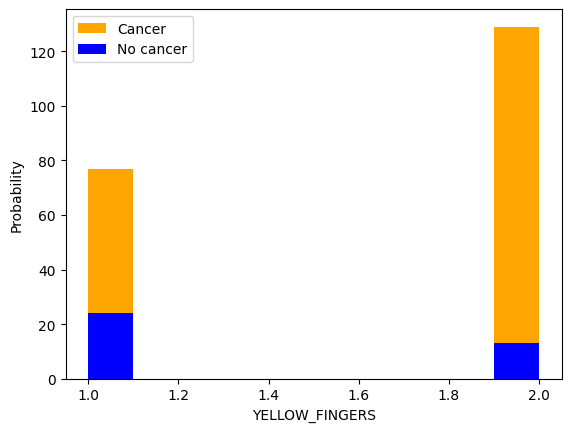

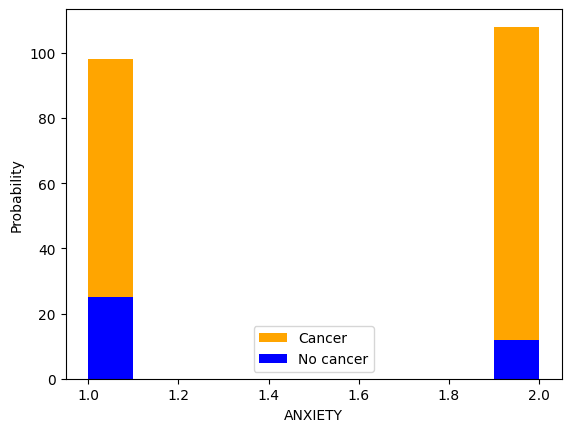

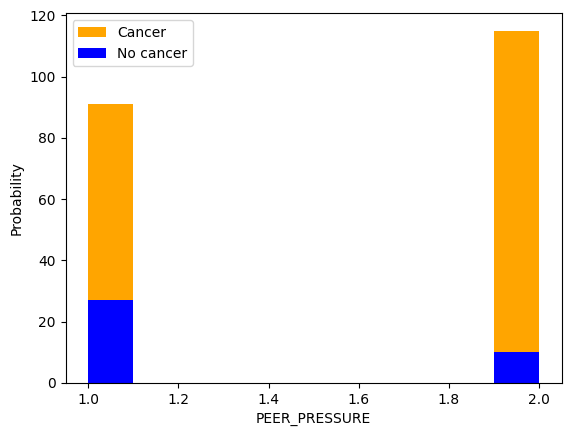

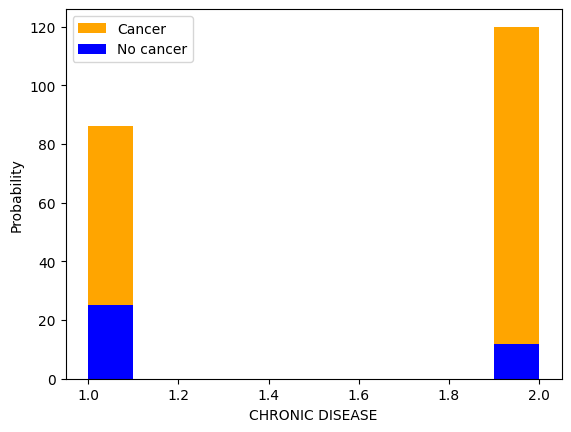

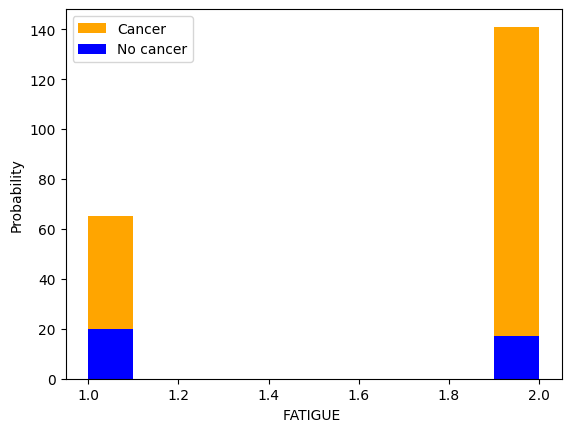

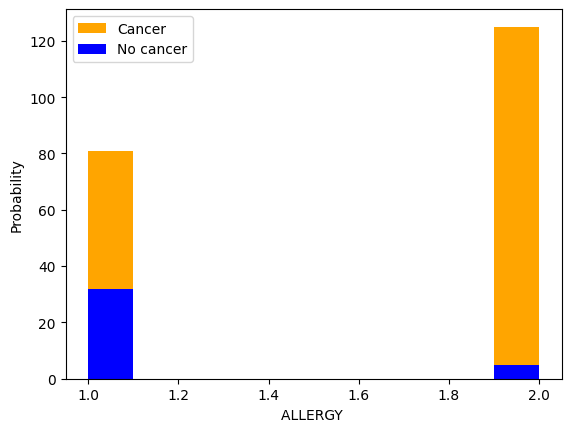

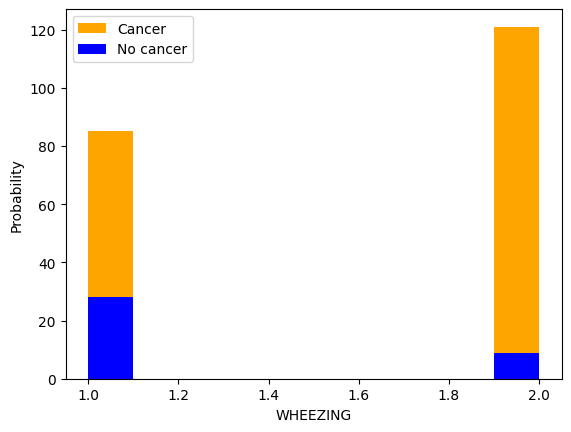

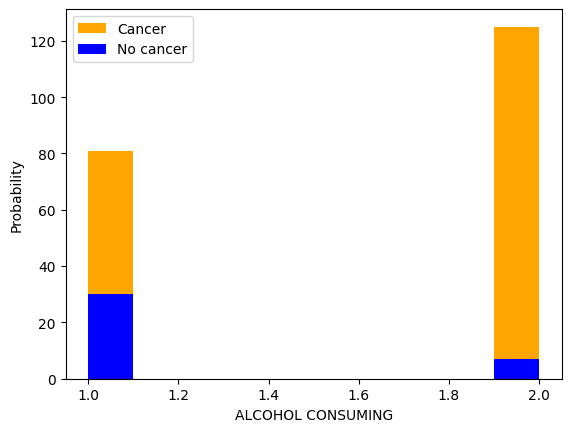

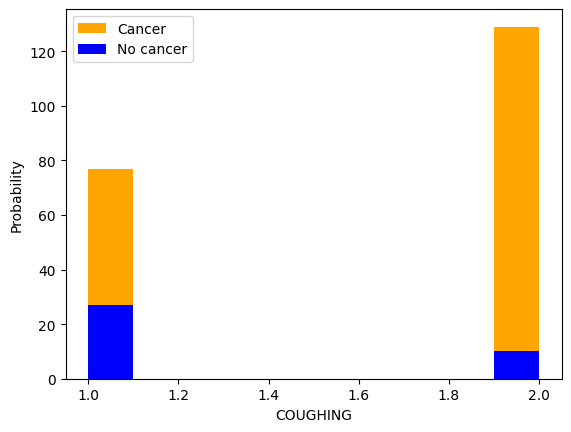

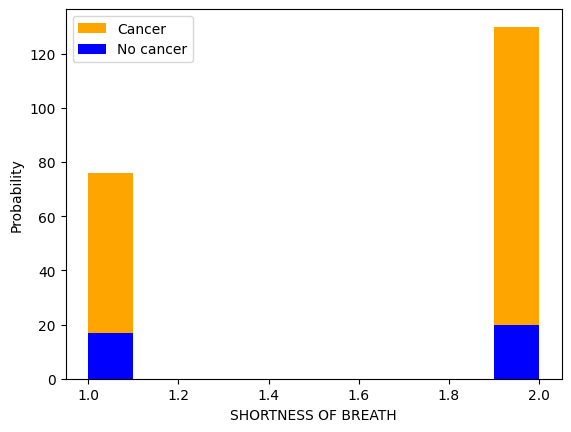

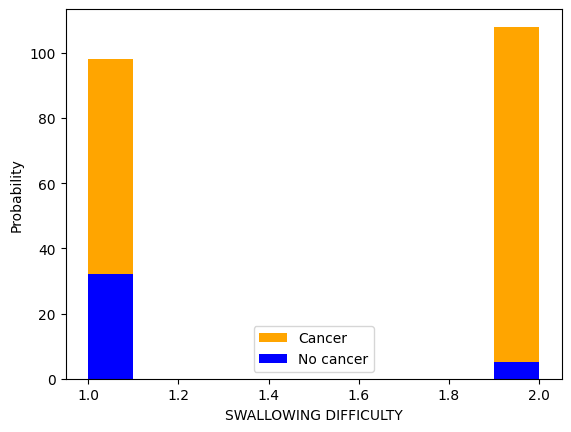

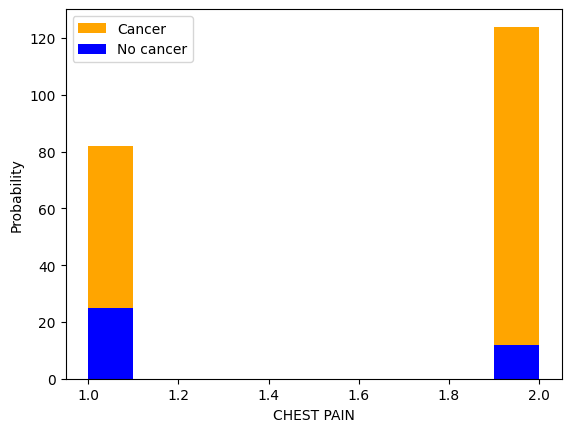

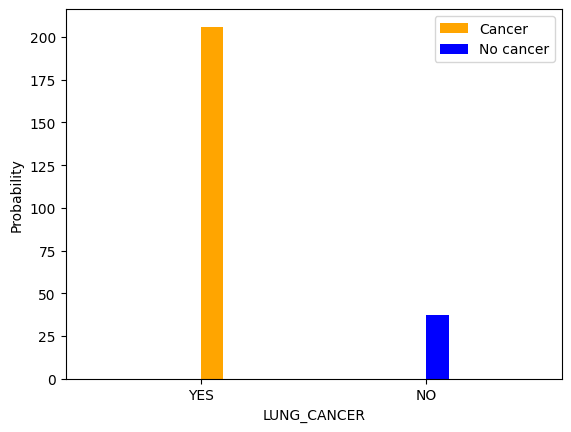

In [16]:
for label in df.iloc[:-1]:
  plt.hist(df[df["LUNG_CANCER"]== "YES"][label], color='orange', label='Cancer') 
  plt.hist(df[df["LUNG_CANCER"]== "NO"][label], color='blue', label='No cancer')
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()



In [37]:
# Replacing string value to int
df['GENDER'].replace({'M': 1, 'F': 2}, inplace = True)
df['LUNG_CANCER'].replace({'YES': 1, 'NO': 0}, inplace = True)
print(df.head())

   GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       1   69        1               2        2              1   
1       1   74        2               1        1              1   
2       2   59        1               1        1              2   
3       1   63        2               2        2              1   
4       2   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0                    2               

In [38]:
X=df.drop(columns=['LUNG_CANCER']).values
y=df['LUNG_CANCER'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [39]:
# MAke a function to split and oversample train dataset
def ros(X_df, y_df, oversample = False):
    
   
    

    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
    if oversample:
        ros = RandomOverSampler()
        X_train, y_train = ros.fit_resample(X_df, y_df)
    return X_train, y_train

In [40]:
# Call the function
X_train, y_train = ros(X_train, y_train, oversample = True)

K-Nearest Neighbor

In [41]:
#Optimal K value formula for KNN
K = math.sqrt(count_row)/2  #Always try to keep the K value odd so that there's no tie when choosing class
#Training the model with K
knn_Model = KNeighborsClassifier(n_neighbors = int(K))
knn_Model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [42]:
#Testing the model
y_pred = knn_Model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.07      0.25      0.11         4
           1       0.91      0.71      0.80        45

    accuracy                           0.67        49
   macro avg       0.49      0.48      0.46        49
weighted avg       0.85      0.67      0.74        49



Decision Tree Classifier

In [43]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
y_pred = decision_tree_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.11      0.25      0.15         4
           1       0.93      0.82      0.87        45

    accuracy                           0.78        49
   macro avg       0.52      0.54      0.51        49
weighted avg       0.86      0.78      0.81        49



Random Forest Classifier

In [45]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.50      0.36         4
           1       0.95      0.89      0.92        45

    accuracy                           0.86        49
   macro avg       0.62      0.69      0.64        49
weighted avg       0.90      0.86      0.87        49



Naive Bayes Classifier

In [47]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [48]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.12      0.25      0.17         4
           1       0.93      0.84      0.88        45

    accuracy                           0.80        49
   macro avg       0.53      0.55      0.53        49
weighted avg       0.86      0.80      0.83        49



Logistic Regression

In [50]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         4
           1       1.00      0.82      0.90        45

    accuracy                           0.84        49
   macro avg       0.67      0.91      0.70        49
weighted avg       0.95      0.84      0.87        49



Gradient Boosting Classifier

In [52]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.fit(X_train,y_train)

GradientBoostingClassifier()

In [53]:
y_pred = gradient_booster.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.75      0.50         4
           1       0.98      0.89      0.93        45

    accuracy                           0.88        49
   macro avg       0.68      0.82      0.72        49
weighted avg       0.93      0.88      0.90        49



SVM Classifier

In [54]:
clf = SVC(kernel='linear', C=1.0)

In [55]:
clf.fit(X_train, y_train)


SVC(kernel='linear')

In [56]:
y_pred = clf.predict(X_test)



print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.31      1.00      0.47         4
           1       1.00      0.80      0.89        45

    accuracy                           0.82        49
   macro avg       0.65      0.90      0.68        49
weighted avg       0.94      0.82      0.85        49

